          Date  Temperature (celsius)
0   01-01-2023                   18.4
1   02-01-2023                   18.2
2   03-01-2023                   18.5
3   04-01-2023                   18.4
4   05-01-2023                   19.0
5   06-01-2023                   19.2
6   07-01-2023                   19.3
7   08-01-2023                   19.5
8   09-01-2023                   19.6
9   10-01-2023                   19.8
10  11-01-2023                   19.4
11  12-01-2023                   20.0
12  13-01-2023                   19.7
13  14-01-2023                   20.1
14  15-01-2023                   20.1
15  16-01-2023                   20.4
16  17-01-2023                   20.6
17  18-01-2023                   20.8
18  19-01-2023                   21.1
19  20-01-2023                   21.4
20  21-01-2023                   21.3
21  22-01-2023                   21.4
22  23-01-2023                   21.5
23  24-01-2023                   21.9
24  25-01-2023                   22.3
25  26-01-20

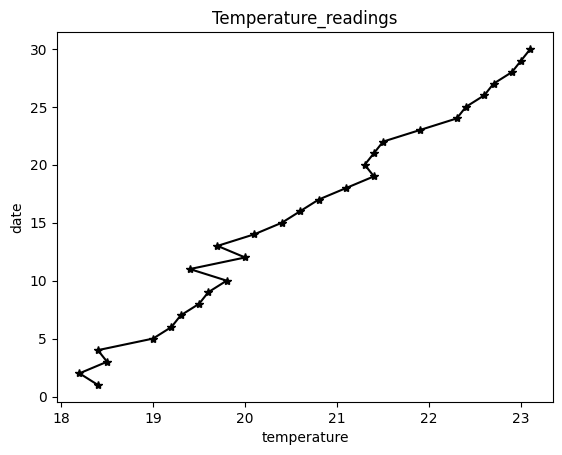

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("/content/temperature dataset for soc-2.csv")
print(df)
# Calculate the average temperature
avg_temp= df['Temperature (celsius)'].mean()
print(avg_temp)
min_temp=df['Temperature (celsius)'].min()
print(min_temp)
l=d.loc[d['Temp'].idxmin(),'Day']
max_temp=df['Temperature (celsius)'].max()
print(max_temp)
a=d.loc[d['Temp'].idxmax(),'Day']
# Set the threshold temperature
threshold = 19.7
# Count the number of days where temperature exceeds the threshold
days_exceed_thresh= df[df['Temperature (celsius)'] > threshold].shape[0]
print(days_exceed_thresh)
date=np.arange(1,31)
temp=np.array([18.4,18.2,18.5,18.4,19.0,19.2,19.3,19.5,19.6,19.8,19.4,20.0,19.7,20.1,20.4,20.6,20.8,21.1,21.4,21.3,21.4,21.5,21.9,22.3,22.4,22.6,22.7,22.9,23.0,23.1])
plt.plot(temp,date,color='black',marker='*')
plt.ylabel('date')
plt.xlabel('temperature')
plt.title('Temperature_readings')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as ttp
from sklearn.metrics import classification_report
import re
import string
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
data=pd.read_csv("/content/heart.csv")
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.shape

(303, 14)

In [ ]:
data1_manual_testing = data.head(10)
for i in range(2,12,1):
  data.drop([i],axis=0, inplace=True)
data2_manual_testing = data.tail(10)
for i in range(302,292,-1):
  data.drop([i],axis=0, inplace=True)

manual_testing = pd.concat([data1_manual_testing,data2_manual_testing], axis=0)
manual_testing.to_csv("manual_testing.csv ")

In [ ]:
x=data["age"]
y=data["output"]

In [ ]:
x_train,x_test,y_train,y_test=ttp(x,y,test_size=0.25,random_state=0)

In [ ]:
x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)
x_train.shape

(212, 1)

In [ ]:
if x_train.shape[1] == 1:
    x_train = x_train.values.reshape(-1, 1)

In [ ]:
print(type(x_test))

<class 'pandas.core.series.Series'>


In [ ]:
x_test = x_test.values.reshape(-1, 1)

In [ ]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
accuracy = LR.score(x_test,y_test).round(2)
print("Accuracy is" , accuracy)
pred_LR= LR.predict(x_test)
print(classification_report(y_test,pred_LR))

Accuracy is 0.59
              precision    recall  f1-score   support

           0       0.70      0.42      0.52        38
           1       0.54      0.79      0.64        33

    accuracy                           0.59        71
   macro avg       0.62      0.60      0.58        71
weighted avg       0.62      0.59      0.58        71



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[16 22]
 [ 7 26]]


<Axes: >

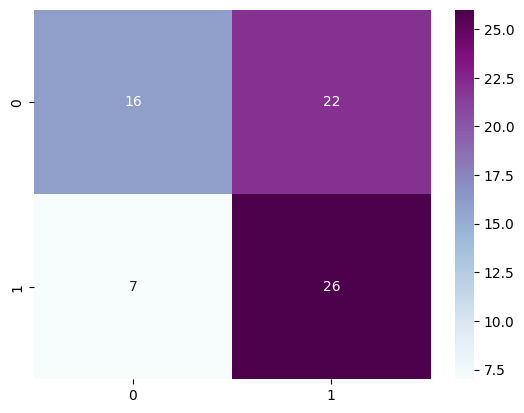

In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,pred_LR)
print(cm)
import seaborn as sns
sns.heatmap(cm,cmap="BuPu",annot=True)

LinearRegression()


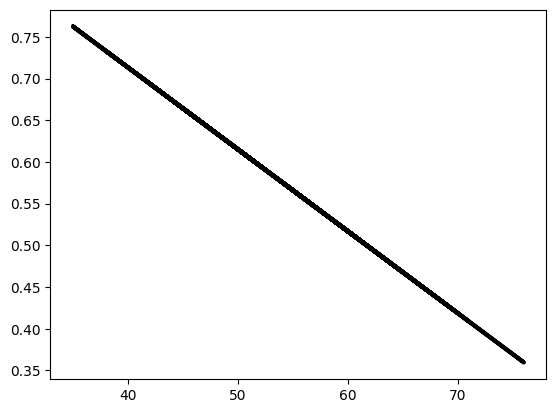

In [ ]:
LR=LinearRegression()
a=LR.fit(x_train,y_train)
print(a)
l=LR.predict(x_test)
plt.plot(x_test,l,linewidth='3',color='black')
plt.show()